## Multiple Linear Regression From Scratch 

In [78]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Load and Prepare Data

In [ ]:

Train_Data = np.array(pd.read_csv("data/usa-housing-train-preprocessed.csv"))
Test_Data = np.array(pd.read_csv("data/usa-housing-test-preprocessed.csv"))
Train_Data, Test_Data


(array([[ 0.00000000e+00, -1.25155908e+00, -2.02901391e+00, ...,
          3.23067688e-01,  7.45056180e-01,  8.81446115e-01],
        [ 1.00000000e+00, -5.89050815e-01,  5.18024568e-01, ...,
         -6.41265090e-01,  1.09858717e+00,  1.37577113e+00],
        [ 2.00000000e+00,  8.22222461e-01, -5.74674299e-01, ...,
         -7.06094185e-01, -9.52839431e-01,  1.13706931e+00],
        ...,
        [ 3.49700000e+03, -2.24058177e-01,  5.35376572e-01, ...,
         -6.81783274e-01,  1.13395100e-01,  1.31859771e+00],
        [ 3.49800000e+03, -9.27903089e-01,  1.42990470e+00, ...,
          2.74445867e-01,  1.39022039e+00,  1.70863137e+00],
        [ 3.49900000e+03, -6.96310473e-01, -8.16115536e-02, ...,
          1.66827140e+00, -1.30800089e-02,  1.06089769e+00]]),
 array([[ 0.00000000e+00, -6.26401650e-01,  1.04968821e+00, ...,
         -5.92643269e-01,  7.72362288e-01,  1.33909608e+00],
        [ 1.00000000e+00, -1.07187640e+00,  9.24024375e-01, ...,
         -6.89886911e-01,  7.35907612e

In [83]:

Train_Set = Train_Data[:, 1:]
X_Train = Train_Set[:, 0:5]
Y_Train = Train_Set[:, 5]


### Visualize Data

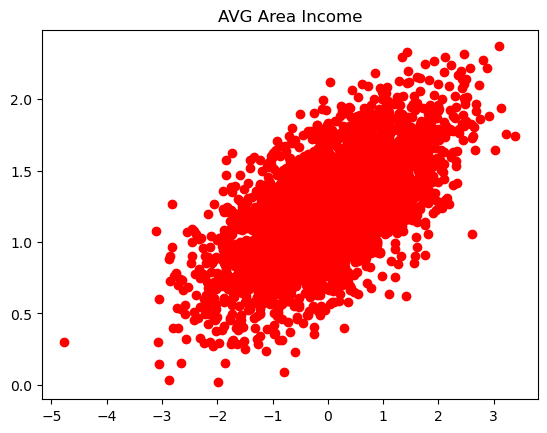

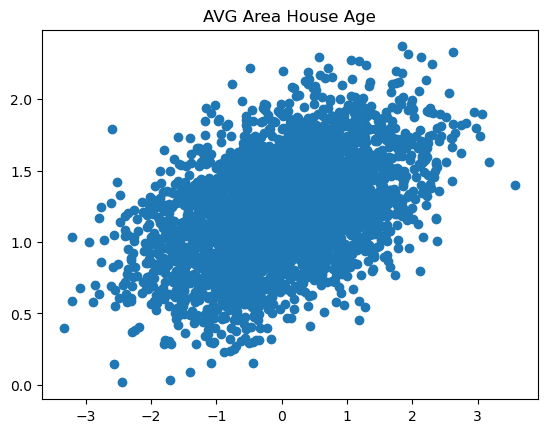

In [86]:

plt.scatter(X_Train[:, 0], Y_Train, color="red")
plt.title("AVG Area Income")
plt.show()

plt.scatter(X_Train[:, 1], Y_Train)
plt.title("AVG Area House Age")
plt.show()


### Define Multiple Linear Regression Functions

In [89]:

def Multi_Reg(x, w):
    y_hat = 0
    for xi, wi in zip(x.T, w):
        y_hat += xi * wi
    return y_hat


In [90]:

def mse(y, y_hat):
    loss = np.mean((y - y_hat) ** 2)
    return loss


In [93]:

def gradient(x, y, y_hat):
    grads = []
    for xi in x.T:
        grads.append(2 * np.mean(xi * (y_hat - y)))
    grads = np.array(grads)
    return grads


In [95]:

def gradient_descent(w, eta, grad):
    w -= eta * grad
    return w


In [97]:

def Mae(y, y_hat):
    loss = np.mean(np.absolute(y - y_hat))
    return loss


In [99]:

def R2(y, yhat):
    return 1 - np.sum((y - yhat) ** 2) / np.sum((y - y.mean()) ** 2)


### Train the Model

In [139]:

eta = 0.01
n_epochs = 2000
n, m = X_Train.shape
w = np.random.randn(m + 1)
x_train = np.hstack((np.ones((n, 1)), X_Train))
error_hist = []

for epoch in range(n_epochs):
    # Predictions
    y_hat = Multi_Reg(x_train, w)

    # Loss
    e = mse(Y_Train, y_hat)
    error_hist.append(e)
    
    # Gradients
    grads = gradient(x_train, Y_Train, y_hat)
    
    # Gradient descent
    w = gradient_descent(w, eta, grads)

    

    # Logging
    if (epoch + 1) % 100 == 0:
        print(f"Epoch={epoch}, 	 E={e:.4},	 w={w}")


Epoch=99, 	 E=0.1161,	 w=[ 1.04047991  0.11127429  0.28409524 -0.07384703  0.15837801  0.20914445]
Epoch=199, 	 E=0.0155,	 w=[1.2060534  0.2128985  0.17877515 0.05995727 0.06361451 0.15800059]
Epoch=299, 	 E=0.01078,	 w=[1.22787521 0.22734478 0.16565166 0.09990606 0.02411275 0.15201012]
Epoch=399, 	 E=0.01034,	 w=[1.23079713 0.22976029 0.16420302 0.11342832 0.01021186 0.15121194]
Epoch=499, 	 E=0.01029,	 w=[1.23120321 0.23026926 0.16411191 0.11807741 0.00542184 0.15107084]
Epoch=599, 	 E=0.01029,	 w=[1.23126451 0.2304034  0.16413466 0.11967678 0.00377554 0.15103573]
Epoch=699, 	 E=0.01029,	 w=[1.23127533 0.23044429 0.16414967 0.1202267  0.00320982 0.15102489]
Epoch=799, 	 E=0.01029,	 w=[1.2312777  0.23045767 0.16415578 0.12041573 0.00301542 0.15102126]
Epoch=899, 	 E=0.01029,	 w=[1.23127834 0.23046218 0.164158   0.12048069 0.00294861 0.15102001]
Epoch=999, 	 E=0.01029,	 w=[1.23127854 0.23046372 0.16415879 0.12050302 0.00292565 0.15101958]
Epoch=1099, 	 E=0.01029,	 w=[1.2312786  0.23046

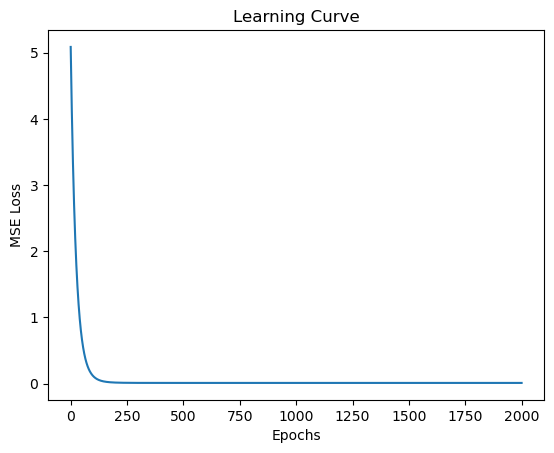

In [147]:

plt.plot(error_hist)
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


### Save Ws

In [151]:
np.save("w_of_multi_reg", w )

### Test the Model

In [154]:
w = np.load("w_of_multi_reg.npy")
Test_Data = pd.read_csv("data/usa-housing-test-preprocessed.csv")
test_set = np.array(Test_Data)[:, 1:]
x_test = test_set[:, 0:5]
y_test = test_set[:, 5]
print(y_test.shape)

x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
y_test_hat = Multi_Reg(x_test, w)

print("MAE:", Mae(y_test, y_test_hat))
print("R2:", R2(y_test, y_test_hat))


(1500,)
MAE: 0.08113556608841585
R2: 0.9146818498776739
